In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
df=pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [7]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [11]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:

# safely drop columns only if they exist to avoid KeyError
cols_to_drop = ['Saving accounts', 'Checking account']
df.drop([c for c in cols_to_drop if c in df.columns], axis=1, inplace=True)


In [10]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose',
       'Risk'],
      dtype='object')

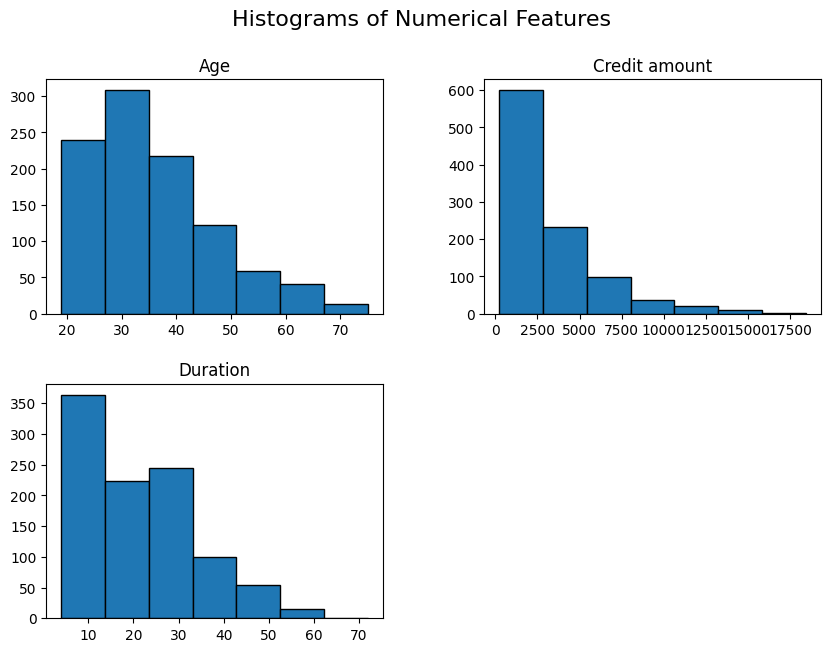

In [12]:
df[['Age', 'Credit amount', 'Duration']].hist(bins=7, figsize=(10, 7),edgecolor='black',grid=False)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

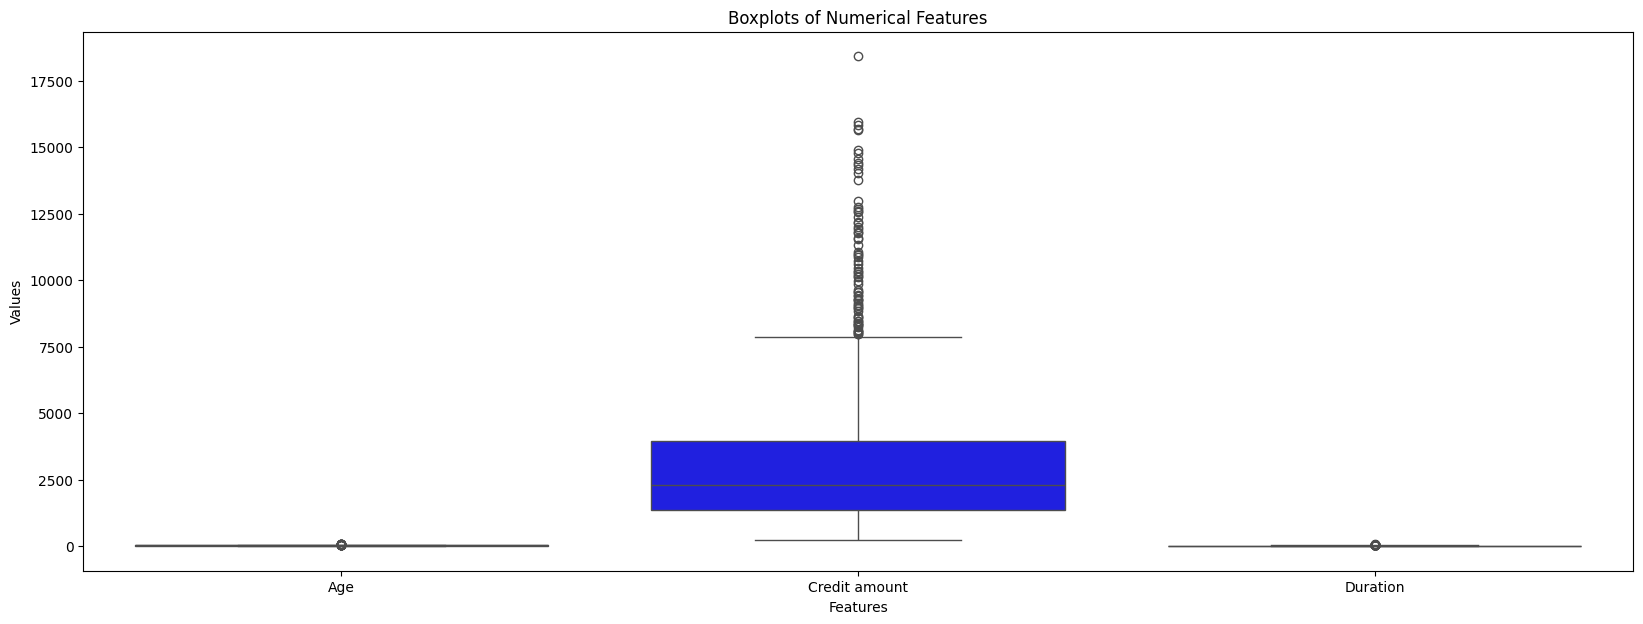

In [20]:
plt.figure(figsize=(20,7))
df_melt=df[['Age', 'Credit amount', 'Duration']].melt(var_name='Features', value_name='Values')
sns.boxplot(data=df_melt,x= 'Features',y='Values',orient='v', color='blue')
plt.title('Boxplots of Numerical Features')
plt.show()



In [21]:
categorical_cols=['Sex', 'Job', 'Housing', 'Purpose', 'Risk']

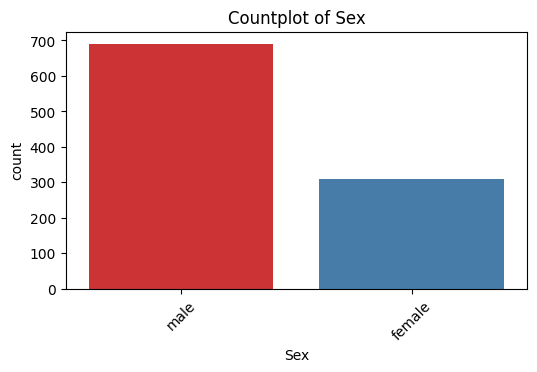

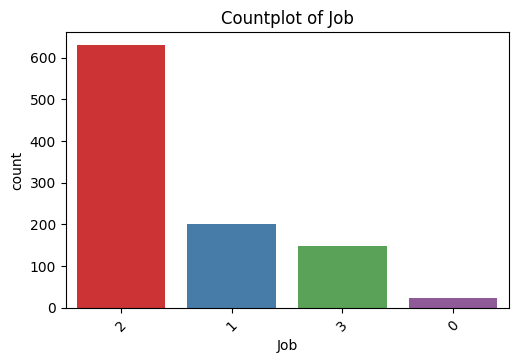

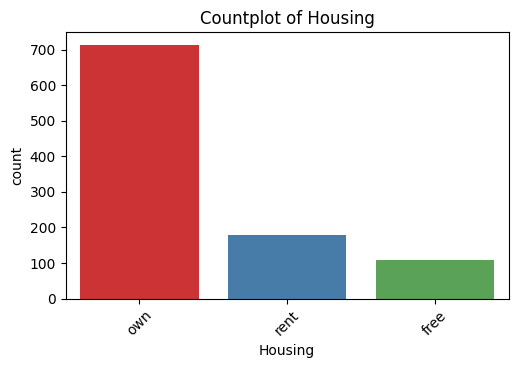

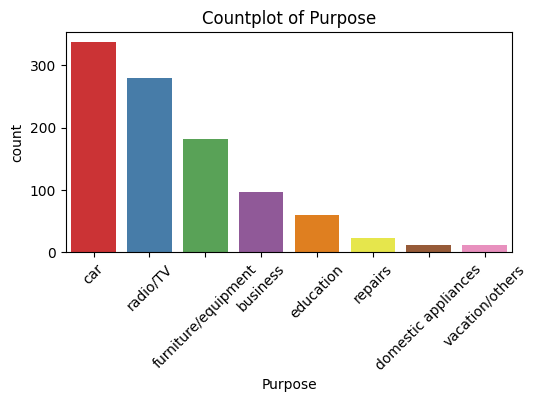

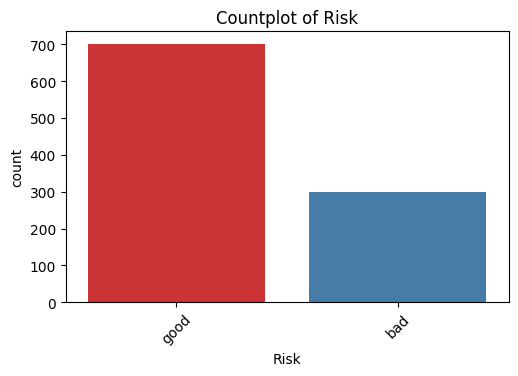

In [24]:
for i,col in enumerate(categorical_cols):
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette='Set1',order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()      

In [29]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose',
       'Risk'],
      dtype='object')

In [31]:
corr=df[['Age', 'Credit amount', 'Duration','Job']].corr()
corr

,Age,Credit amount,Duration,Job
Age,1.000000,0.032716,-0.036136,0.015673
Credit amount,0.032716,1.000000,0.624984,0.285385
Duration,-0.036136,0.624984,1.000000,0.210910
Job,0.015673,0.285385,0.210910,1.000000


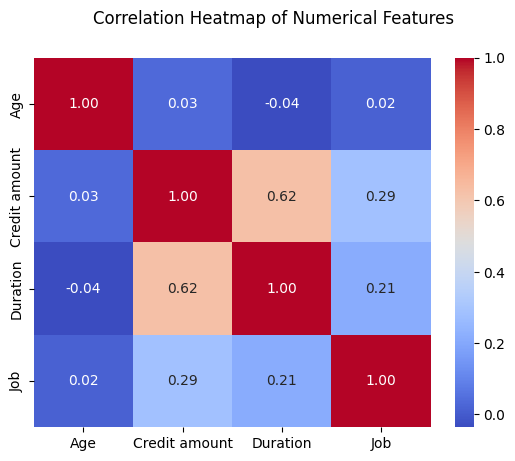

In [34]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle('Correlation Heatmap of Numerical Features')
plt.show()

In [39]:
pd.pivot_table(df,values='Credit amount',index='Housing',columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


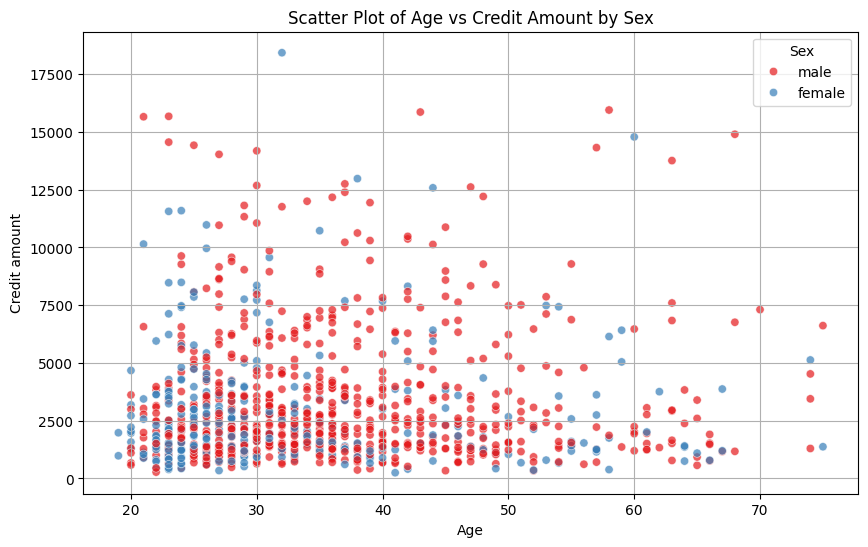

In [43]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Sex', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Age vs Credit Amount by Sex')
plt.grid(True)
plt.show()

In [46]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose',
       'Risk'],
      dtype='object')

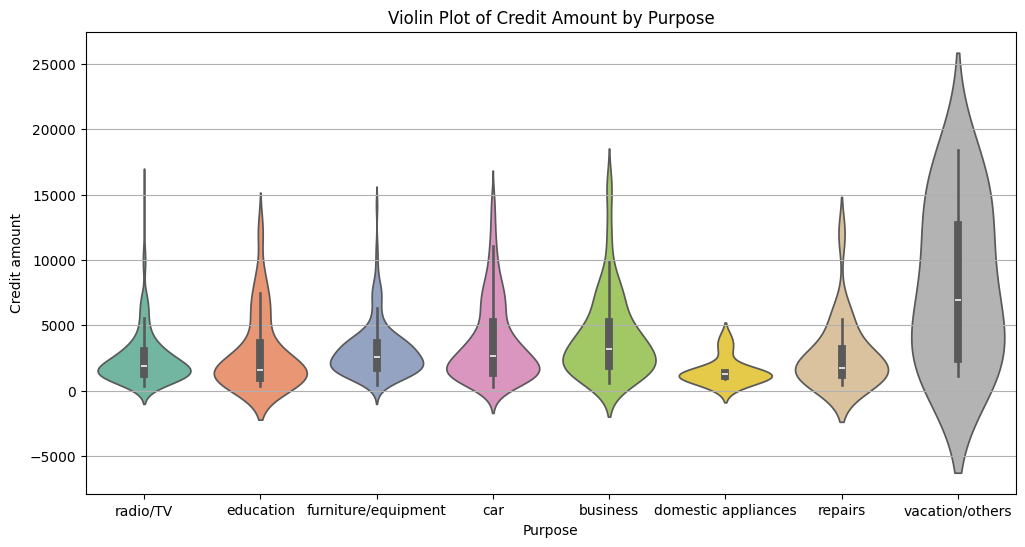

In [53]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.violinplot(data=df, x='Purpose', y='Credit amount', palette='Set2')

plt.title('Violin Plot of Credit Amount by Purpose')
plt.show()

In [56]:
df.groupby('Risk')[['Age','Credit amount','Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


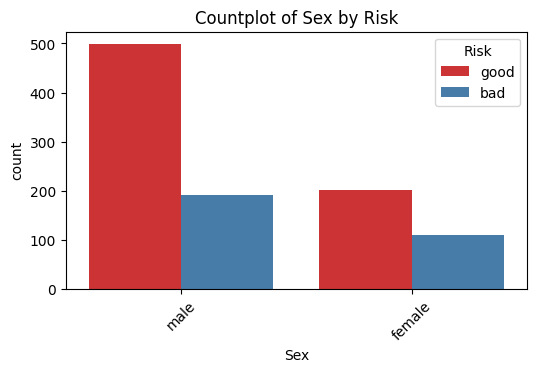

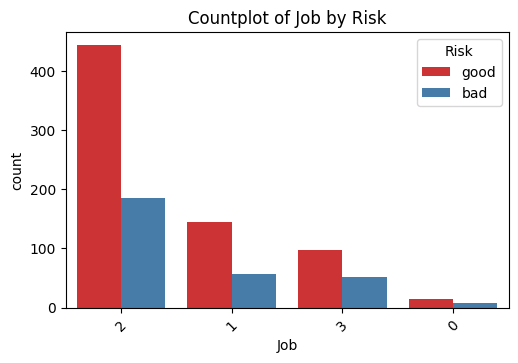

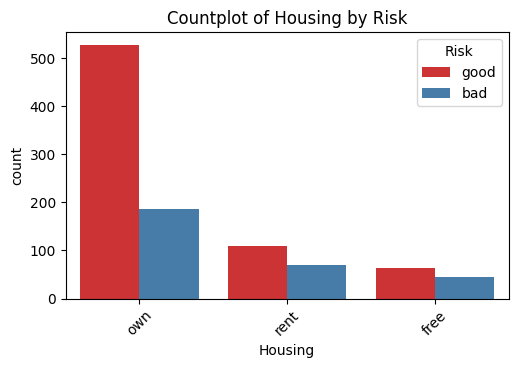

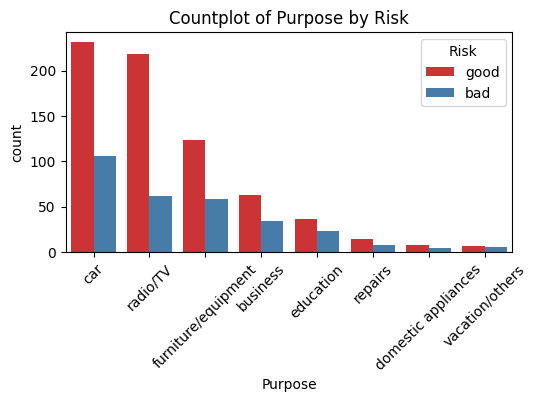

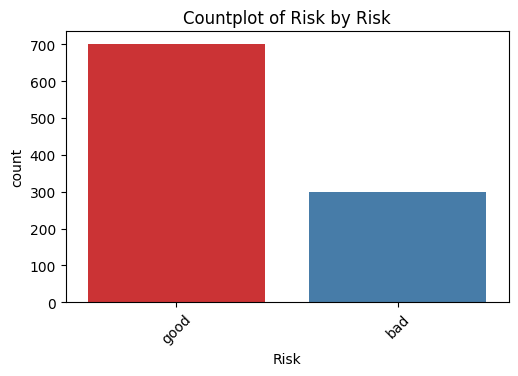

In [60]:
for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(15,10))
   
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue='Risk',palette='Set1',order=df[col].value_counts().index)
    plt.title(f'Countplot of {col} by Risk')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [61]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose',
       'Risk'],
      dtype='object')

In [64]:
features=['Age', 'Credit amount', 'Duration','Job','Sex','Housing','Purpose']
target='Risk'

In [66]:
df_model=df[features + [target]].copy()
df_model.head()

,Age,Credit amount,Duration,Job,Sex,Housing,Purpose,Risk
0,67,1169,6,2,male,own,radio/TV,good
1,22,5951,48,2,female,own,radio/TV,bad
2,49,2096,12,1,male,own,education,good
3,45,7882,42,2,male,free,furniture/equipment,good
4,53,4870,24,2,male,free,car,bad


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib # for saving the encoder

In [71]:
cat_cols=df_model.select_dtypes(include=['object']).columns.drop(target, errors='ignore')


In [72]:
cat_cols

Index(['Sex', 'Housing', 'Purpose'], dtype='object')

In [74]:
for col in cat_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    joblib.dump(le,f'{col}_encoder.pkl')

In [75]:
le_target=LabelEncoder()

In [76]:
target

'Risk'

In [77]:
df_model[target]=le_target.fit_transform(df_model[target])

In [79]:
df_model[target].value_counts() # Good=1,Bad=0

Risk
1    700
0    300
Name: count, dtype: int64

In [80]:
joblib.dump(le_target,'target_encoder.pkl')

['target_encoder.pkl']

In [81]:
df_model.head()

,Age,Credit amount,Duration,Job,Sex,Housing,Purpose,Risk
0,67,1169,6,2,1,1,5,1
1,22,5951,48,2,0,1,5,0
2,49,2096,12,1,1,1,3,1
3,45,7882,42,2,1,0,4,1
4,53,4870,24,2,1,0,1,0


In [82]:
from sklearn.model_selection import train_test_split
X=df_model.drop(target,axis=1)
y=df_model[target]

In [83]:
X

,Age,Credit amount,Duration,Job,Sex,Housing,Purpose
0,67,1169,6,2,1,1,5
1,22,5951,48,2,0,1,5
2,49,2096,12,1,1,1,3
3,45,7882,42,2,1,0,4
4,53,4870,24,2,1,0,1
...,...,...,...,...,...,...,...
995,31,1736,12,1,0,1,4
996,40,3857,30,3,1,1,1
997,38,804,12,2,1,1,5
998,23,1845,45,2,1,0,5


In [84]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [87]:
X_train.shape

(800, 7)

In [88]:
X_test.shape

(200, 7)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV   

In [91]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return best_model, accuracy, report, cm

In [93]:
dt=DecisionTreeClassifier(random_state=1,class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [94]:
best_dt, dt_accuracy, dt_report, dt_cm = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [98]:

print("Decision Tree Accuracy:", dt_accuracy)
print('Best Parameters:', best_dt.get_params())

Decision Tree Accuracy: 0.61
Best Parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}


In [99]:
rf=RandomForestClassifier(random_state=1,class_weight='balanced')
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [100]:
best_rf, rf_accuracy, rf_report, rf_cm = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [101]:
print("Random Forest Accuracy:", rf_accuracy)
print('Best Parameters:', best_rf.get_params())

Random Forest Accuracy: 0.675
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [102]:
et=ExtraTreesClassifier(random_state=1,class_weight='balanced')
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [103]:
best_et, et_accuracy, et_report, et_cm = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)
print("Extra Trees Accuracy:", et_accuracy)
print('Best Parameters:', best_et.get_params())

Extra Trees Accuracy: 0.66
Best Parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [109]:
best_et.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [110]:
joblib.dump(best_et,'ExtraTreesClassifier_GermanCreditModel.pkl')

['ExtraTreesClassifier_GermanCreditModel.pkl']